In [ ]:
# @title Download Data
%%bash
# wget https://s3.amazonaws.com/argoverse/datasets/av2/tars/motion-forecasting/train.tar
wget https://s3.amazonaws.com/argoverse/datasets/av2/tars/motion-forecasting/val.tar
# wget https://s3.amazonaws.com/argoverse/datasets/av2/tars/motion-forecasting/test.tar

tar -xvf val.tar
rm -r /content/sample_data
rm val.tar

git clone https://github.com/argoverse/av2-api.git
mv /content/av2-api/src/av2/_r.pyi /content/av2-api/src/av2/_r.py

pip install kornia
pip3 install colorama
pip install universal-pathlib

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
import sys
sys.path.append("/content/av2-api/src")

In [ ]:
from av2.datasets.motion_forecasting import scenario_serialization

from pathlib import Path
from colorama import Style, Fore
blk = Style.BRIGHT + Fore.BLACK
red = Style.BRIGHT + Fore.RED
blu = Style.BRIGHT + Fore.BLUE
res = Style.RESET_ALL

SCENE_TRACK = "/content/val/00010486-9a07-48ae-b493-cf4545855937/scenario_00010486-9a07-48ae-b493-cf4545855937.parquet"

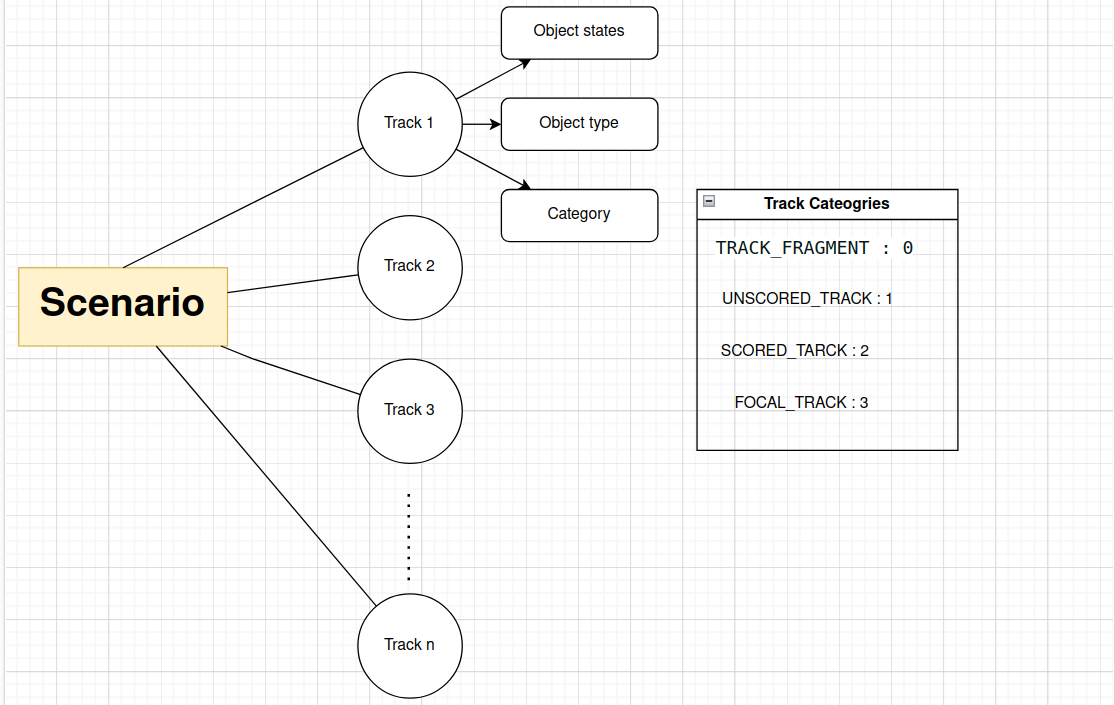

# Types of objects:

- `VEHICLE`
- `PEDESTRIAN`
- `MOTORCYCLIST`
- `CYCLIST`
- `BUS`
- `STATIC`
- `BACKGROUND`
- `CONSTRUCTION`
- `RIDERLESS_BICYCLE`
- `UNKNOWN`.

# State of Object
- `observed`: Boolean indicating if this object state falls in the observed segment of the scenario.
- `timestep`: Time step corresponding to this object state [0, num_scenario_timesteps).
- `position`: (x, y) Coordinates of center of object bounding box.
- `heading`: Heading associated with object bounding box (in radians, defined w.r.t the map coordinate frame).
- `velocity`: (x, y) Instantaneous velocity associated with the object (in m/s).


# Categories of Track
`TrackCategory`:

            - TRACK_FRAGMENT: Low quality track that may only contain a few timestamps of observations.
            - UNSCORED_TRACK: Track of reasonable quality, but not scored - can be used for contextual input.
            - SCORED_TRACK: High-quality tracks relevant to the AV - scored in the multi-agent prediction challenge.
            - FOCAL_TRACK: The track used to generate a particular scenario - scored in the single-agent prediction challenge.


- **class** ArgoverseScenario: Bundles all data associated with an Argoverse scenario.
            - scenario_id: Unique ID associated with this scenario.
            - timestamps_ns: All timestamps associated with this scenario.
            - tracks: All tracks associated with this scenario.
            - focal_track_id: The track ID associated with the focal agent of the scenario.
            - `city_name`: The name of the city associated with this scenario.
            - `map_id`: The map ID associated with the scenario (used for internal bookkeeping).
            - `slice_id`: ID of the slice used to generate the scenario (used for internal bookkeeping).


In [ ]:
argo_scenario = scenario_serialization.load_argoverse_scenario_parquet(SCENE_TRACK) # Argoverse_scenario Object

# Attributes of argoverse scenario

for att in dir(argo_scenario):
  if att[:2] != "__":
    print(f"{red}{att}{res} : ".ljust(30) + f"{blk}{argo_scenario.__getattribute__(att)}{res}")

city_name :      austin
focal_track_id : 77544
map_id :         None
scenario_id :    00010486-9a07-48ae-b493-cf4545855937
slice_id :       None
timestamps_ns :  [3.15977348e+17 3.15977348e+17 3.15977348e+17 3.15977349e+17
 3.15977349e+17 3.15977349e+17 3.15977349e+17 3.15977349e+17
 3.15977349e+17 3.15977349e+17 3.15977349e+17 3.15977349e+17
 3.15977349e+17 3.15977350e+17 3.15977350e+17 3.15977350e+17
 3.15977350e+17 3.15977350e+17 3.15977350e+17 3.15977350e+17
 3.15977350e+17 3.15977350e+17 3.15977350e+17 3.15977351e+17
 3.15977351e+17 3.15977351e+17 3.15977351e+17 3.15977351e+17
 3.15977351e+17 3.15977351e+17 3.15977351e+17 3.15977351e+17
 3.15977351e+17 3.15977352e+17 3.15977352e+17 3.15977352e+17
 3.15977352e+17 3.15977352e+17 3.15977352e+17 3.15977352e+17
 3.15977352e+17 3.15977352e+17 3.15977352e+17 3.15977353e+17
 3.15977353e+17 3.15977353e+17 3.15977353e+17 3.15977353e+17
 3.15977353e+17 3.15977353e+17 3.15977353e+17 3.15977353e+17
 3.15977353e+17 3.15977354e+17 3.15977354e+17

In [ ]:
print(f"{blk}Number of tracks in first scenario: {red}{len(argo_scenario.tracks)}")

Number of tracks in first scenario: 75


In [ ]:
df = scenario_serialization._convert_tracks_to_tabular_format(argo_scenario.tracks)

df

,observed,track_id,object_type,object_category,timestep,position_x,position_y,heading,velocity_x,velocity_y
0,True,77543,vehicle,1,0,-11.823674,-567.402397,2.850212,-10.135780,3.035927
1,True,77543,vehicle,1,1,-12.393206,-567.225316,2.850076,-10.164790,3.032990
2,True,77543,vehicle,1,2,-13.080372,-567.009694,2.849730,-10.185672,3.031219
3,True,77543,vehicle,1,3,-13.880497,-566.754410,2.849045,-10.144089,3.014031
4,True,77543,vehicle,1,4,-14.773627,-566.465386,2.847962,-10.107290,2.997265
...,...,...,...,...,...,...,...,...,...,...
3147,False,AV,vehicle,1,105,-23.548876,-554.673215,1.778290,-1.239570,5.540075
3148,False,AV,vehicle,1,106,-23.655122,-554.182797,1.741685,-1.238732,5.540297
3149,False,AV,vehicle,1,107,-23.739483,-553.741816,1.709823,-0.932708,5.578300
3150,False,AV,vehicle,1,108,-23.803986,-553.357487,1.683036,-0.713468,5.880906


Percentage of Observed vs not observed in first scenario : 
False    2079
True     1073
Name: observed, dtype: int64


<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


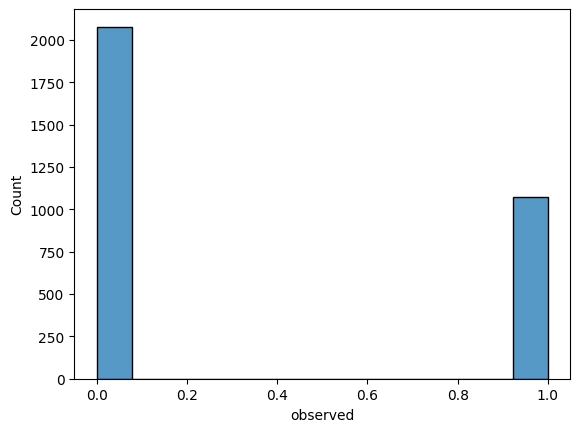

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt

print(f"{blk}Percentage of Observed vs not observed in first scenario :{res} \n{red}{df['observed'].value_counts()}")
sns.histplot(df['observed']);
plt.show();


Number of unique tracks in first scenario : 
75


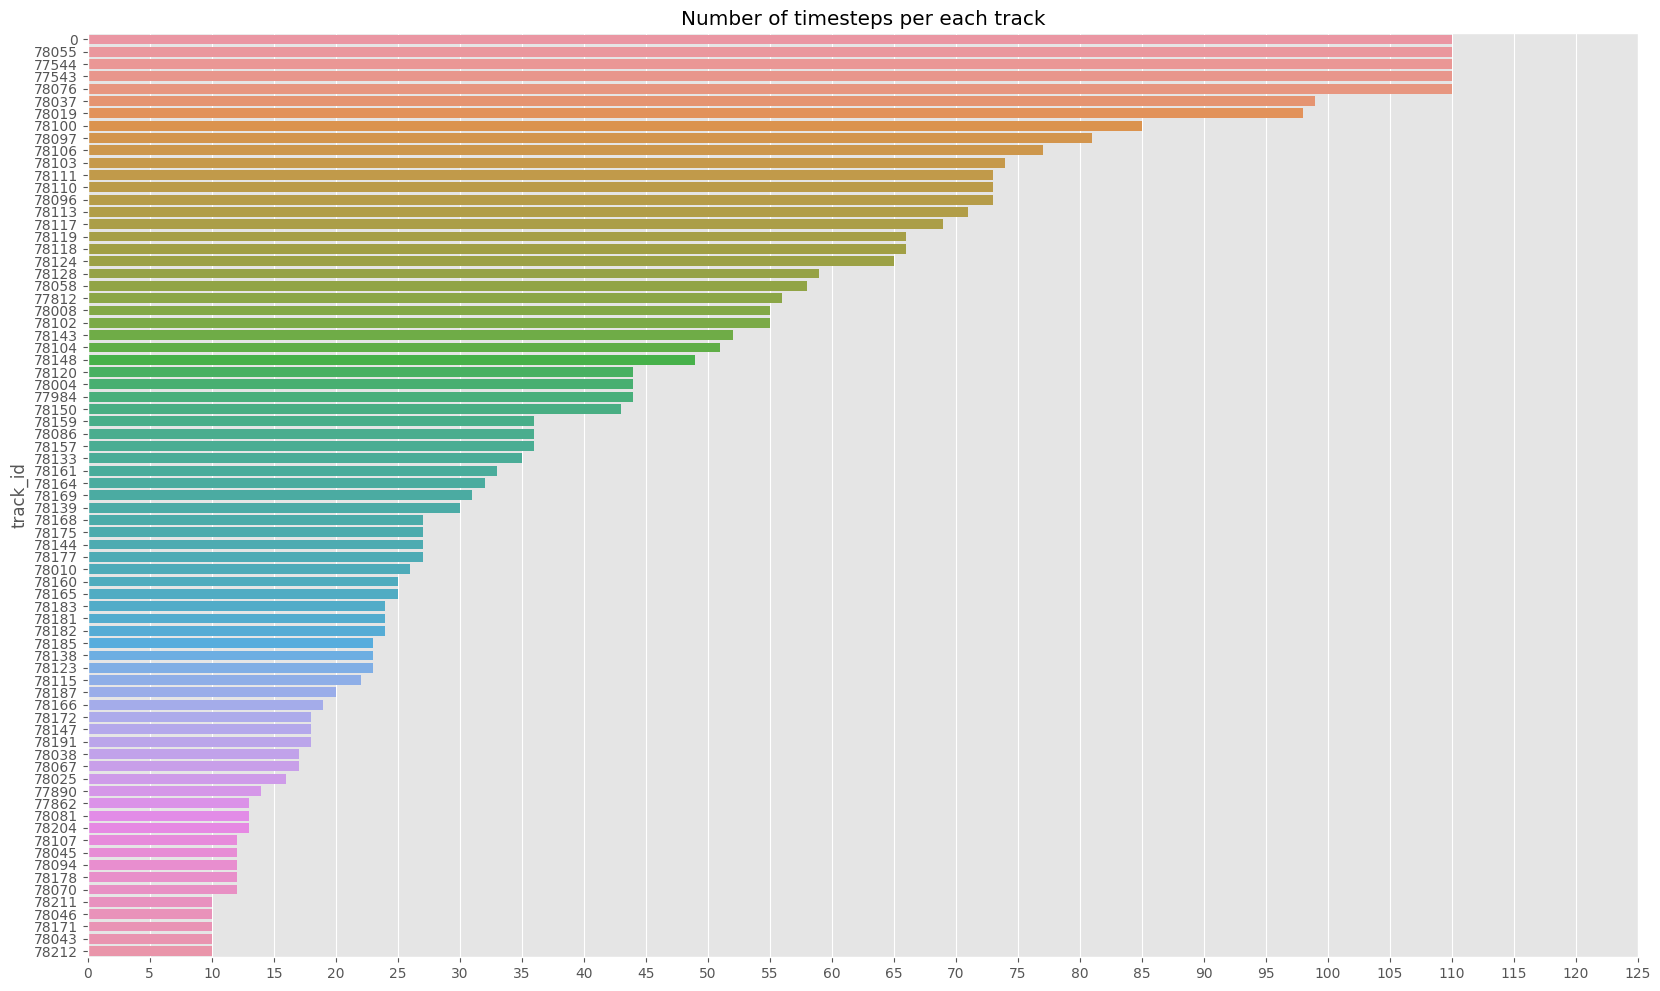

In [ ]:
df.loc[df['track_id']=="AV", 'track_id'] = "0"  # Convert AV track to be track with id = 0

print(f"{blk}Number of unique tracks in first scenario :{res} \n{red}{df['track_id'].nunique()}")

plt.style.use('ggplot')

tmp = df.groupby('track_id').count()['observed'].sort_values(ascending=False)
plt.figure(figsize=(20, 12))
sns.barplot(y=tmp.index, x=tmp.values)
plt.title("Number of timesteps per each track")

plt.xticks(range(0, 130, 5))
plt.show();

Number of each object in first scenario : 
vehicle              1870
construction          688
riderless_bicycle     169
background            154
pedestrian            111
motorcyclist           98
static                 42
unknown                20
Name: object_type, dtype: int64


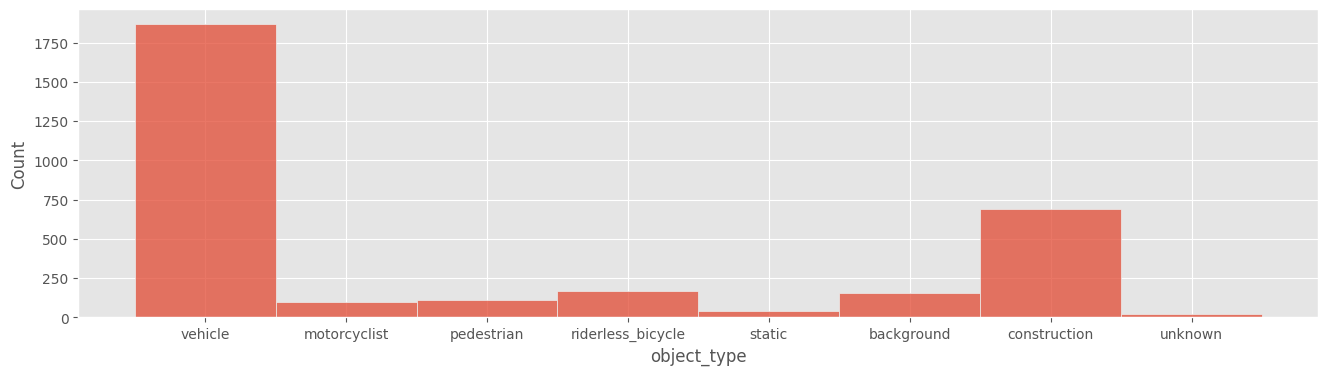

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt

print(f"{blk}Number of each object in first scenario :{res} \n{red}{df['object_type'].value_counts()}")

plt.figure(figsize=(16, 4))
sns.histplot(df['object_type']);
plt.show();

Maximum number of objects in one timestep: 43
Minimum number of objects in one timestep: 17


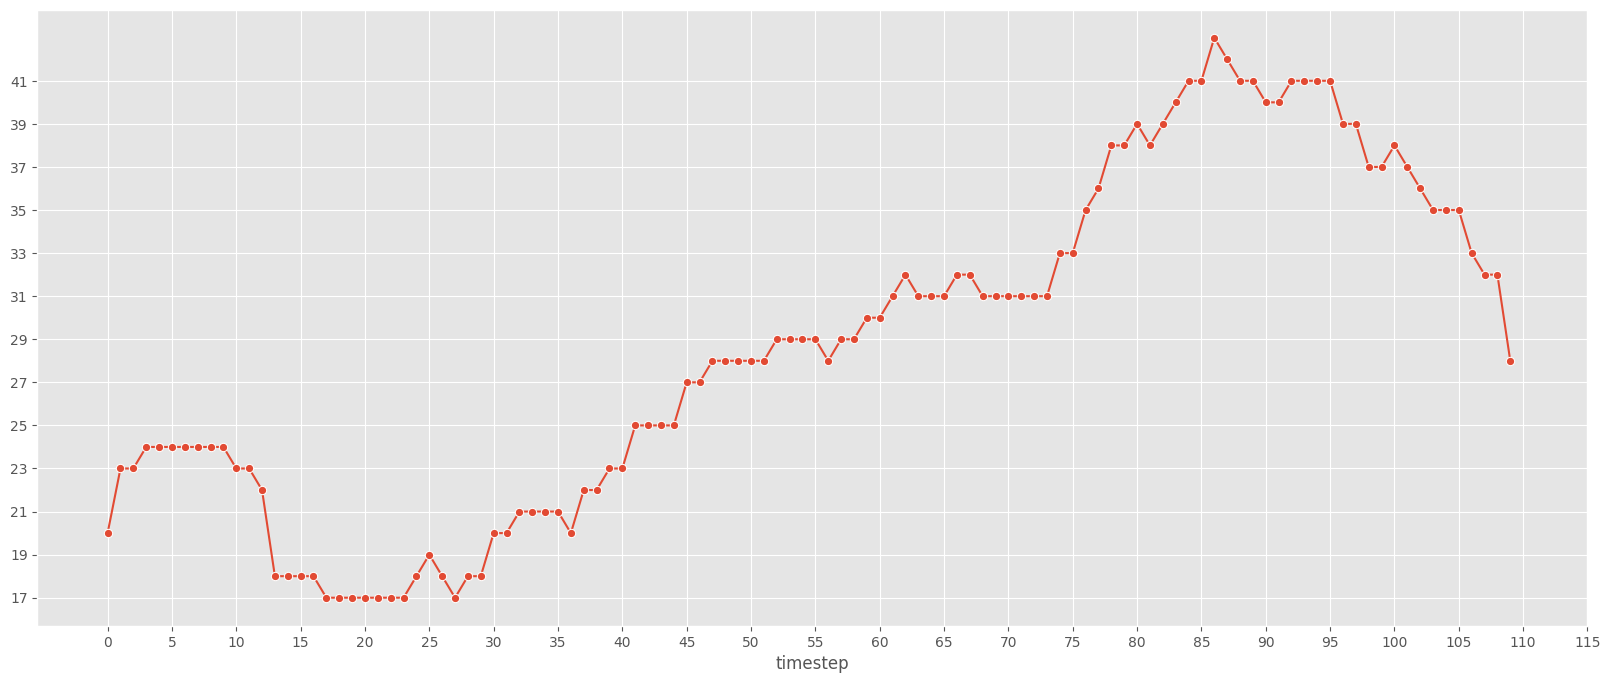

In [ ]:
# Plot Number of objects in each timesteps

tmp = df.groupby('timestep').count().iloc[:, 0]
plt.figure(figsize=(20, 8))
sns.lineplot(x=tmp.index, y=tmp.values, marker='o')

plt.xticks(range(0, 120, 5))
plt.yticks(range(tmp.values.min(), tmp.values.max(), 2))

print(f"{blk}Maximum number of objects in one timestep: {red}{tmp.values.max()}")
print(f"{blk}Minimum number of objects in one timestep: {red}{tmp.values.min()}")

plt.show()

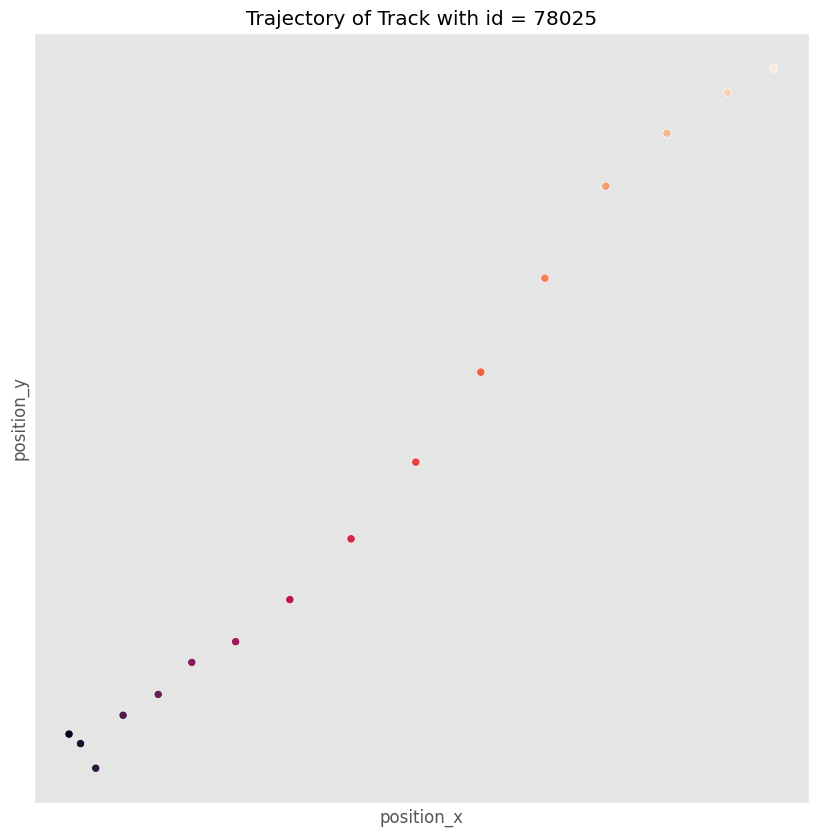

In [ ]:
def draw_traj(df, track_id):
  if isinstance(track_id, int):
    track_id = str(track_id)
  plt.figure(figsize=(10, 10))
  tmp = df.loc[df['track_id']==track_id, ['timestep', 'position_x', 'position_y']]

  tmp = tmp.sort_values(by='timestep')

  sns.scatterplot(x=tmp['position_x'], y=tmp['position_y'], c=tmp['timestep'], cmap="rocket")

  plt.grid('off')
  plt.xticks([])
  plt.yticks([])
  plt.title(f'Trajectory of Track with id = {track_id}')
  plt.show()

# examples of track id : 0, '78008', '78010', '78019', '78025', '78037', '78038', '78043','78045', '78046', '78055', '78058', '78067', '78070', '78076',
draw_traj(df, '78025')

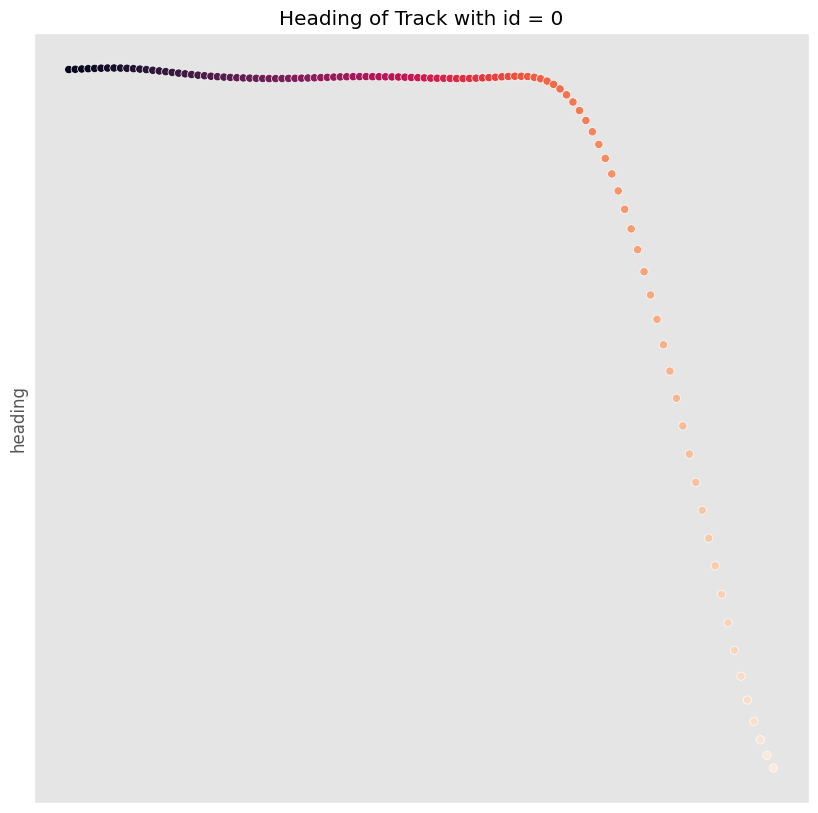

In [ ]:
def vis_heading(df, track_id):
  if isinstance(track_id, int):
    track_id = str(track_id)
  plt.figure(figsize=(10, 10))
  tmp = df.loc[df['track_id']==track_id, ['timestep', 'heading']]

  tmp = tmp.sort_values(by='timestep')

  sns.scatterplot(x=range(len(tmp)), y=tmp['heading'], c=tmp['timestep'], cmap="rocket")

  plt.grid('off')
  plt.xticks([])
  plt.yticks([])
  plt.title(f'Heading of Track with id = {track_id}')
  plt.show()

# examples of track id : 0, '78008', '78010', '78019', '78025', '78037', '78038', '78043','78045', '78046', '78055', '78058', '78067', '78070', '78076',
vis_heading(df, '0')

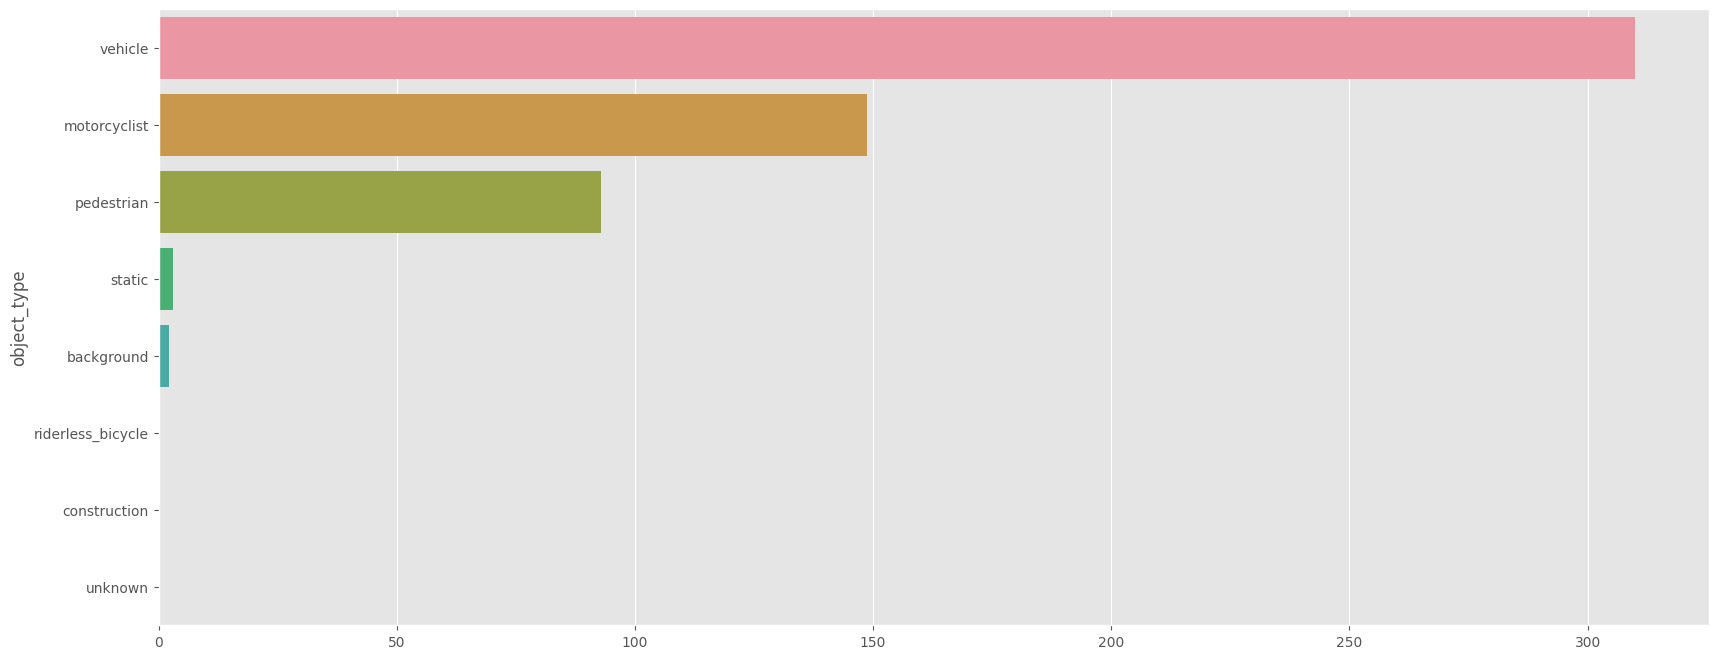

In [ ]:
import numpy as np
def get_abs_velocity(x, y):
  return np.sqrt(np.power(x, 2) + np.power(y, 2))

df['abs_velocity'] = get_abs_velocity(df['velocity_x'], df['velocity_y'])

# Average velocity of each object
tmp = (df.groupby('object_type')['abs_velocity'].mean()*100).sort_values(ascending=False)

plt.figure(figsize=(20, 8))
sns.barplot(x=tmp.values, y=tmp.index)

plt.show()

# Vis module

In [ ]:
from av2.map.map_api import ArgoverseStaticMap
from av2.datasets.motion_forecasting.viz import scenario_visualization as scene_vis

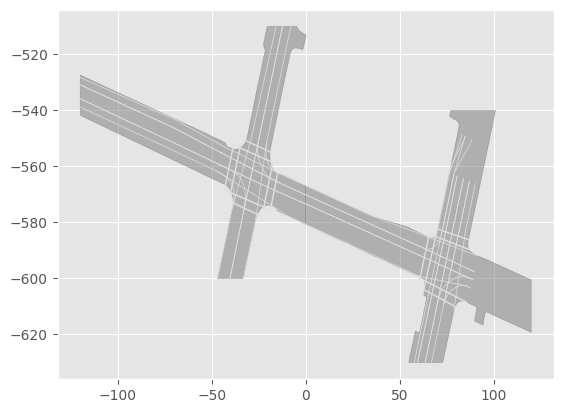

In [ ]:
# Visualize static map first
static_map_path = "/content/val/00010486-9a07-48ae-b493-cf4545855937/log_map_archive_00010486-9a07-48ae-b493-cf4545855937.json"
static_map_path = Path(static_map_path)
static_map = ArgoverseStaticMap.from_json(static_map_path)

scene_vis._plot_static_map_elements(static_map, show_ped_xings=True)

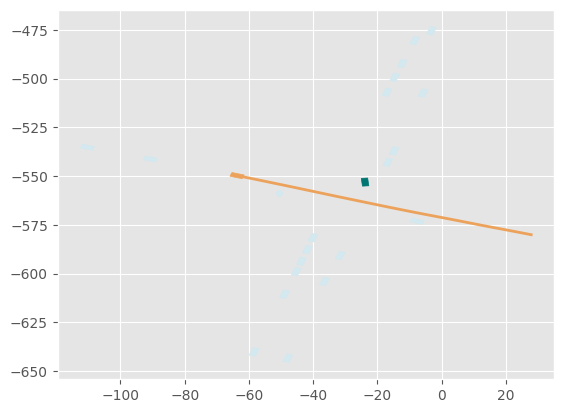

In [ ]:
# Plot all actors in scenario s, timestep t
fig, ax = plt.subplots()

scene_vis._plot_actor_tracks(ax, argo_scenario, 109)

plt.show();

In [ ]:
# Visualize Scenario
scene_vis.visualize_scenario(argo_scenario, static_map, Path('/content'))